In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cPickle
from scipy import signal


In [2]:
# Load the dataset ...
#  You will need to seperately download or generate this file
Xd = cPickle.load(open("RML2016.10a_dict.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [3]:
# Partition the data
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.5
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [4]:
in_shp = list(X_train.shape[1:])
print X_train.shape, in_shp
classes = mods

(110000, 2, 128) [2, 128]


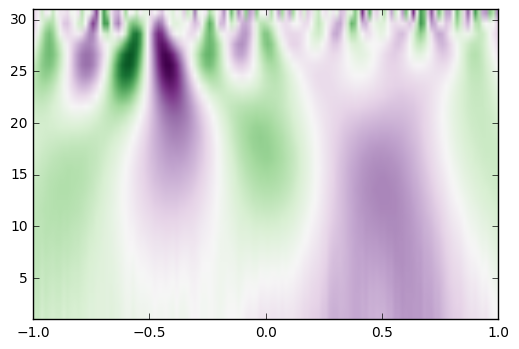

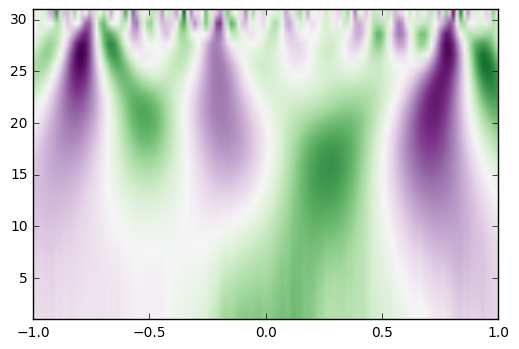

CPFSK


In [26]:
def to_image(index):
    widths = np.arange(1, 31)    
    R = signal.cwt(X_train[0][0], signal.ricker, widths)
    G = signal.cwt(X_train[0][1], signal.ricker, widths)
    plt.imshow(R, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
               vmax=abs(R1).max(), vmin=-abs(R1).max())
    plt.show()

    plt.imshow(G, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
               vmax=abs(G1).max(), vmin=-abs(G1).max())
    plt.show()
    print classes[list(Y_train[index]).index(1)]
    
to_image(0)



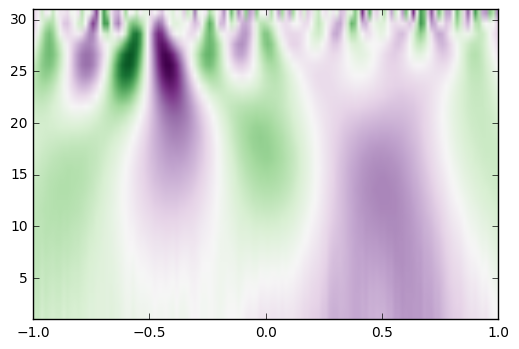

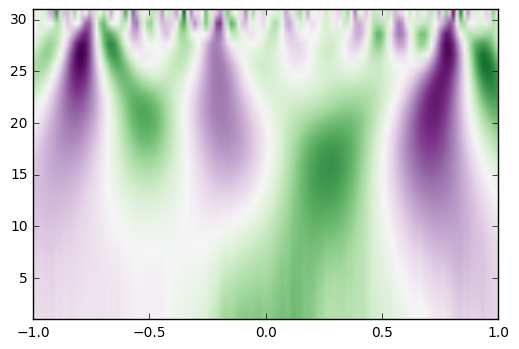

AM-SSB


In [27]:
to_image(1)


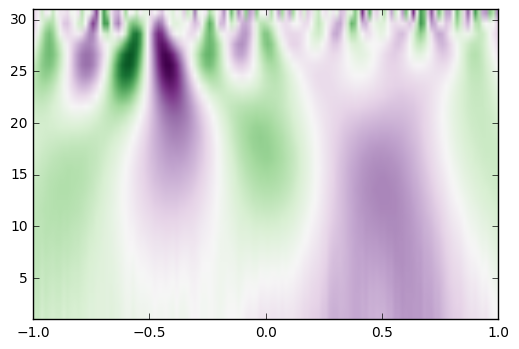

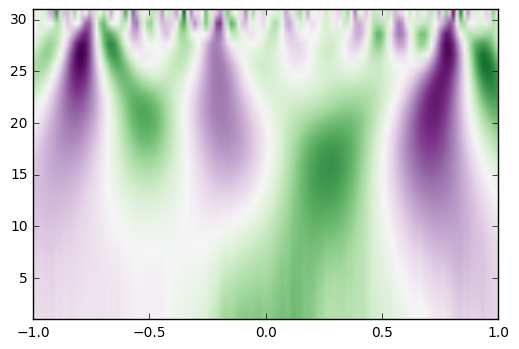

QAM16


In [28]:
to_image(2)


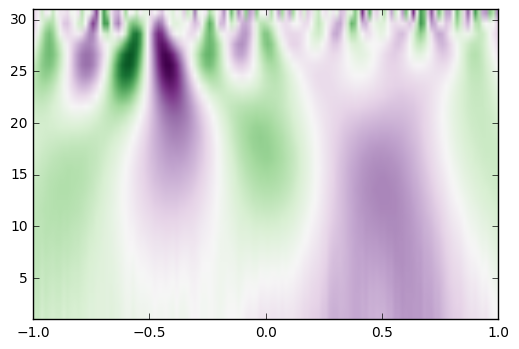

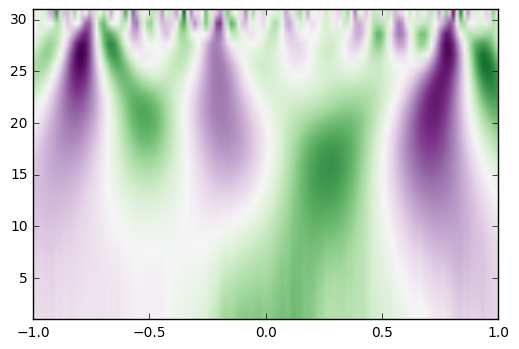

WBFM


In [29]:
to_image(3)


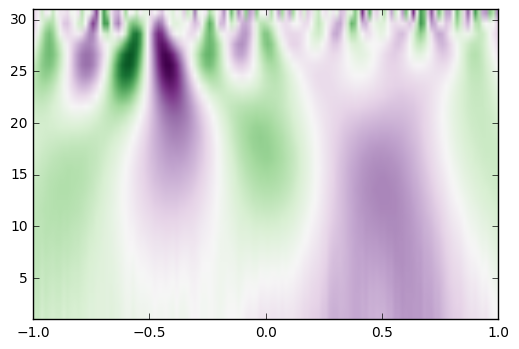

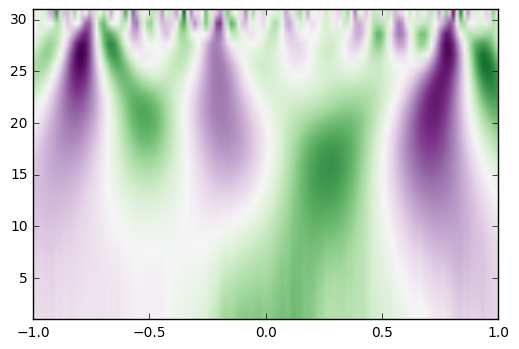

QPSK


In [30]:
to_image(4)
